## comma package tutorial

In [1]:
from comma.model import Model
from comma import create_empty_hypotheses
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
np.random.seed(0)
dir_params = '../parameters/'

# Create empty matrices in `dir_params` folder

Store in the `dir_params` directory folder templates of the matrices. The templates are all empty (i.e., made of 0s) and serve the purpose of providing a ready-to-be-filled guide for the user to specify their hypotheses about both the type of lockdown, and the effects of each action on the mental health and number of contacts.

In [2]:
create_empty_hypotheses(dir_params)

### Initialize agents with some example hypotheses

For demonstration purposes, we load now from the `parameters_example` directory folder the matrices containing some of the hypotheses that we have made up. We also specify a population made of 100 agents.

### Initialise the model and generate 100 individuals

In [3]:
model = Model()

In [4]:
size = 100
individuals = model.setup(size, '../parameters_example/')

### Run the model

This will output "simulation_results.csv". You can define the type of lockdown (among "hard", "easy", "medium", "no_lockdown") for each number of steps.

In [5]:
lockdowns = ['absent', 'easy', 'medium', 'hard']
steps = 10
# at the moment we are randomising it but ideally one should give the sequence of lockdowns for each step
repeated_entries = lockdowns * (steps // len(lockdowns)) + lockdowns[:steps % len(lockdowns)]
randomised_lockdowns = random.sample(repeated_entries, len(repeated_entries))

In [6]:
model.run(steps=steps, lockdown=randomised_lockdowns, out_path="simulation_results.csv")

In [7]:
data = pd.read_csv('simulation_results.csv')

### Group by step_id and compute the average mh and n_contacts

In [8]:
display(data.head())

,step_id,agent_id,lockdown,mh,n_contacts
0,0,0,medium,1.0,2.8
1,0,1,medium,2.0,2.8
2,0,2,medium,1.0,1.1
3,0,3,medium,-1.0,2.4
4,0,4,medium,9.5,7.9


In [9]:
grouped_data = data.groupby('lockdown').mean()[['mh', 'n_contacts']]

In [10]:
grouped_data = data.groupby(['step_id', 'lockdown']).mean().reset_index()
display(grouped_data.head())

,step_id,lockdown,agent_id,mh,n_contacts
0,0,medium,49.5,4.250,5.064
1,1,medium,49.5,4.110,5.219
2,2,hard,49.5,3.390,4.094
3,3,absent,49.5,5.260,6.130
4,4,easy,49.5,5.215,5.866


### Create a scatter plot of the average mh and n_contacts for each step coloured by lockdown type

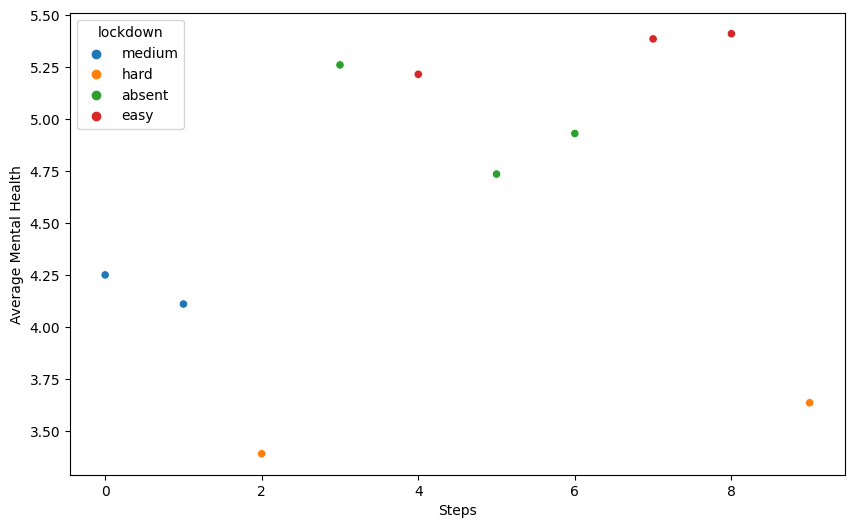

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='step_id', y='mh', hue='lockdown')
plt.xlabel('Steps')
plt.ylabel('Average Mental Health')
plt.show()

In [12]:
data.groupby(['lockdown']).mean().reset_index()

,lockdown,step_id,agent_id,mh,n_contacts
0,absent,4.666667,49.5,4.975000,5.745000
1,easy,6.333333,49.5,5.336667,6.058333
2,hard,5.500000,49.5,3.512500,4.087000
3,medium,0.500000,49.5,4.180000,5.141500


#### Average mental health by lockdown type

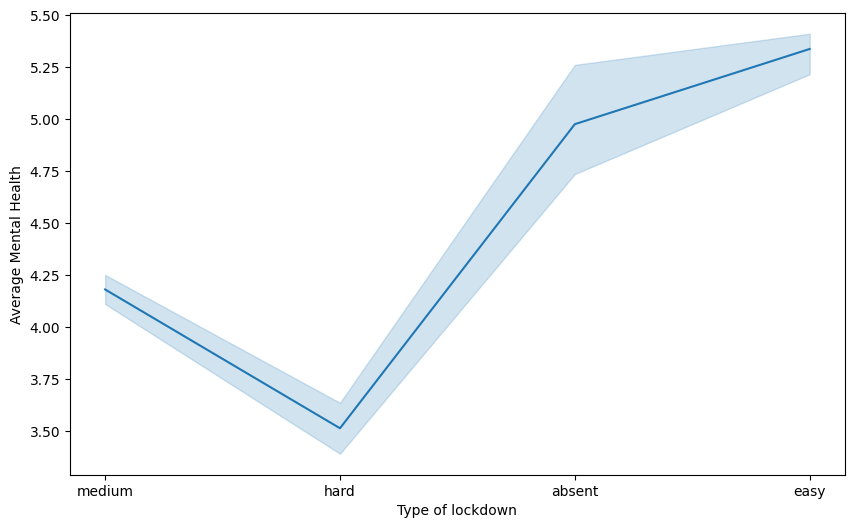

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x="lockdown", y="mh")
plt.xlabel('Type of lockdown')
plt.ylabel('Average Mental Health')
plt.show()